In [91]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
!pip install scipy

You should consider upgrading via the 'c:\users\an\desktop\surp\path planning\scripts\python.exe -m pip install --upgrade pip' command.


  Using cached scipy-1.7.0-cp38-cp38-win_amd64.whl (33.7 MB)


In [92]:
list_grid_map = np.arange(9)
print(f'size of grid_map: {len(list_grid_map)}')
print(f'list grid_map: {list_grid_map}')

size of grid_map: 9
list grid_map: [0 1 2 3 4 5 6 7 8]


In [93]:
dimensions = (3,3)
grid_map = list_grid_map.reshape(3,3)
print(f'grid map: \n{grid_map}')

grid map: 
[[0 1 2]
 [3 4 5]
 [6 7 8]]


We want the array above to be turned into this directed graph below
<br> <br> <img src = "example-node-image.png" width=400 height=400 />

Now we need to check for corners on the grid in order to make sure the edges are added correctly. <br>
After checking for corners, we then add the available edges onto each individual nodes

In [94]:
Grid = nx.Graph()
Grid.add_nodes_from(list_grid_map)
dimensions = grid_map.shape
for row in range(dimensions[0]):
    for col in range(dimensions[1]):
        directions = {'up': True,'down': True,'left': True,'right': True, 'up-left': True, 'up-right': True, 'down-left': True, 'down-right': True}
        #direction removal checks
        if row == 0:
            directions['up'] = False
            directions['up-left'] = False
            directions['up-right'] = False
        if row == dimensions[0]-1:
            directions['down'] = False
            directions['down-left'] = False
            directions['down-right'] = False
        if col == 0:
            directions['left'] = False
            directions['up-left'] = False
            directions['down-left'] = False
        if col == dimensions[1]-1:
            directions['right'] = False
            directions['up-right'] = False
            directions['down-right'] = False
        
        
        for direction, tf in directions.items():
            if tf:
                if directions=='up':
                    Grid.add_edge(grid_map[row,col], grid_map[row-1,col])
                elif direction=='right':
                    Grid.add_edge(grid_map[row,col], grid_map[row,col+1])
                elif direction=='down':
                    Grid.add_edge(grid_map[row,col], grid_map[row+1,col])
                elif direction=='left':
                    Grid.add_edge(grid_map[row,col], grid_map[row,col-1])
                elif direction=='up-left':
                     Grid.add_edge(grid_map[row,col], grid_map[row-1,col-1])
                elif direction=='up-right':
                     Grid.add_edge(grid_map[row,col], grid_map[row-1,col+1])
                elif direction=='down-left':
                     Grid.add_edge(grid_map[row,col], grid_map[row+1,col-1])
                elif direction=='down-right':
                     Grid.add_edge(grid_map[row,col], grid_map[row+1,col+1])

In [95]:
#checking if above works
print('Checking if the edge assignment code snip is working')
for i in range(len(list_grid_map)):
    print(f'  Adjacent edges for {i}: {Grid[i]}')

Checking if the edge assignment code snip is working
  Adjacent edges for 0: {3: {}, 1: {}, 4: {}}
  Adjacent edges for 1: {0: {}, 4: {}, 2: {}, 3: {}, 5: {}}
  Adjacent edges for 2: {1: {}, 5: {}, 4: {}}
  Adjacent edges for 3: {0: {}, 1: {}, 6: {}, 4: {}, 7: {}}
  Adjacent edges for 4: {0: {}, 1: {}, 2: {}, 3: {}, 7: {}, 5: {}, 6: {}, 8: {}}
  Adjacent edges for 5: {1: {}, 2: {}, 4: {}, 8: {}, 7: {}}
  Adjacent edges for 6: {3: {}, 4: {}, 7: {}}
  Adjacent edges for 7: {3: {}, 4: {}, 5: {}, 6: {}, 8: {}}
  Adjacent edges for 8: {4: {}, 5: {}, 7: {}}


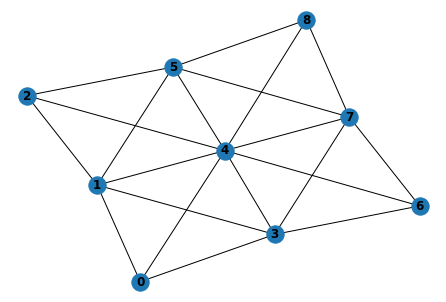

In [96]:
nx.draw(Grid, with_labels=True, font_weight='bold')

In [97]:
#testing if all of the code above for edge assignment worked
assert set(dict(Grid[0])) == {1,3,4}
assert set(dict(Grid[1])) == {0,3,4,5,2}
assert set(dict(Grid[2])) == {1,4,5}
assert set(dict(Grid[3])) == {0,1,4,7,6}
assert set(dict(Grid[4])) == {0,1,2,3,5,6,7,8}
assert set(dict(Grid[5])) == {1,2,4,7,8}
assert set(dict(Grid[6])) == {3,4,7}
assert set(dict(Grid[7])) == {3,4,5,6,8}
assert set(dict(Grid[8])) == {7,4,5}

In [98]:
def assigning_edges(Grid: 'Networkx Edgeless Graph', grid_map: 'numpy array',dimensions: (int,int)):
    for row in range(dimensions[0]):
        for col in range(dimensions[1]):
            directions = {'up': True,'down': True,'left': True,'right': True, 'up-left': True, 'up-right': True, 'down-left': True, 'down-right': True}
            #direction removal checks
            if row == 0:
                directions['up'] = False
                directions['up-left'] = False
                directions['up-right'] = False
            if row == dimensions[0]-1:
                directions['down'] = False
                directions['down-left'] = False
                directions['down-right'] = False
            if col == 0:
                directions['left'] = False
                directions['up-left'] = False
                directions['down-left'] = False
            if col == dimensions[1]-1:
                directions['right'] = False
                directions['up-right'] = False
                directions['down-right'] = False

            for direction, tf in directions.items():
                if tf:
                    if directions=='up':
                        Grid.add_edge(grid_map[row,col], grid_map[row-1,col])
                    elif direction=='right':
                        Grid.add_edge(grid_map[row,col], grid_map[row,col+1])
                    elif direction=='down':
                        Grid.add_edge(grid_map[row,col], grid_map[row+1,col])
                    elif direction=='left':
                        Grid.add_edge(grid_map[row,col], grid_map[row,col-1])
                    elif direction=='up-left':
                         Grid.add_edge(grid_map[row,col], grid_map[row-1,col-1])
                    elif direction=='up-right':
                         Grid.add_edge(grid_map[row,col], grid_map[row-1,col+1])
                    elif direction=='down-left':
                         Grid.add_edge(grid_map[row,col], grid_map[row+1,col-1])
                    elif direction=='down-right':
                         Grid.add_edge(grid_map[row,col], grid_map[row+1,col+1])
    return Grid

In [99]:
#generalizing the grid generalization algorithm into a function
def generate_grid(row: int, height: int) -> 'Networkx Graph':
    dimensions = (row,height)
    list_grid_map = np.arange(row*height)
    grid_map = list_grid_map.reshape(row,height)
    Grid = nx.Graph()
    Grid.add_nodes_from(list_grid_map)
    
    Grid = assigning_edges(Grid, grid_map, dimensions)
    return Grid

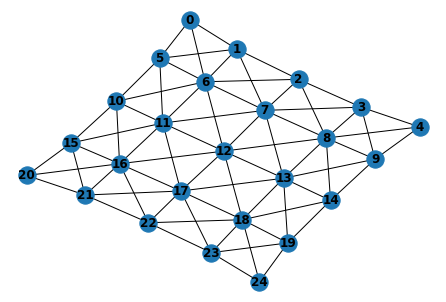

In [102]:
test = generate_grid(5,5)
nx.draw(test, with_labels=True, font_weight='bold')

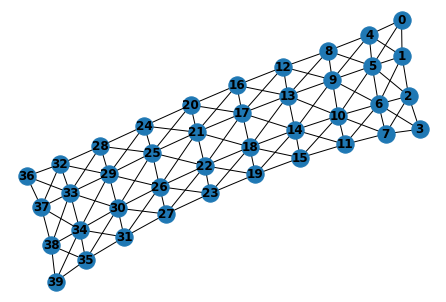

In [106]:
test = generate_grid(10,4)
nx.draw(test, with_labels=True, font_weight='bold')

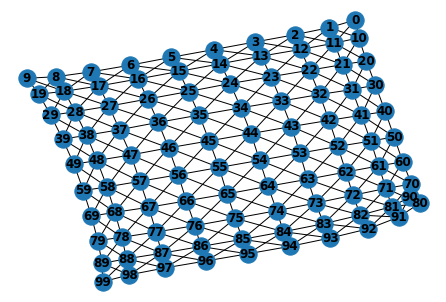

In [107]:
test = generate_grid(10,10)
nx.draw(test, with_labels=True, font_weight='bold')

Testing how easy it is to generate larger dimensional grids

In [117]:
test = generate_grid(100,100)

In [118]:
test = generate_grid(500,500)

Testing removing nodes from a grid

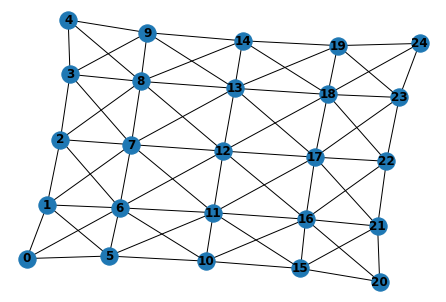

In [124]:
victim_grid = generate_grid(5,5)
nx.draw(victim_grid, with_labels=True, font_weight='bold')

In [126]:
victim_grid.remove_node(12)

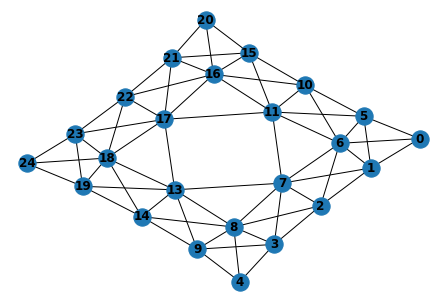

In [129]:
nx.draw(victim_grid, with_labels=True, font_weight='bold')